In [24]:
import matplotlib.pyplot as plt
import networkx as nx

edges = [
    ("Анализ информационных моделей", "Поиск информации в реляционных базах данных"),
    ("Поиск информации в реляционных базах данных", "Работа с таблицами"),
    ("Работа с таблицами", "Поиск символов в текстовом редакторе"),
    ("Поиск символов в текстовом редакторе", "Определение результатов работы алгоритмов"),
    ("Определение результатов работы алгоритмов", "Программирование"),
    ("Программирование", "Безопасность данных"),
    ("Кодирование и декодирование информации", "Организация компьютерных сетей. Адресация"),
    ("Организация компьютерных сетей. Адресация", "Безопасность данных"),
    ("Кодирование и декодирование информации", "Безопасность данных"),
    ("Анализ информационных моделей", "Определение результатов работы алгоритмов"),
    ("Поиск информации в реляционных базах данных", "Определение результатов работы алгоритмов"),
    ("Поиск информации в реляционных базах данных", "Кодирование и декодирование информации"),
    ("Работа с таблицами", "Организация компьютерных сетей. Адресация")
]

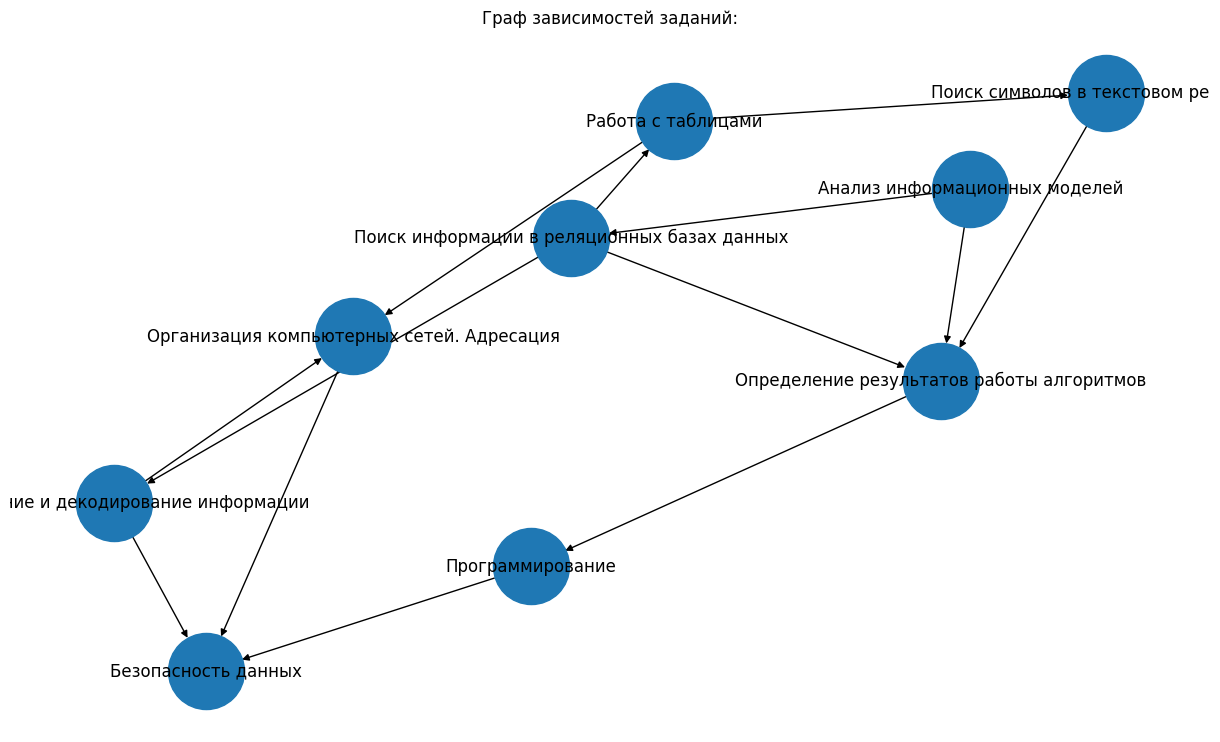

In [25]:
G = nx.DiGraph()
G.add_edges_from(edges)

plt.figure(figsize=(12, 7))
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_size=3000)
plt.title('Граф зависимостей заданий:')
plt.show()

In [26]:
if nx.is_directed_acyclic_graph(G):
    print('Тест №1 пройден. Граф ацикличен.')
else:
    print('Тест №1 не пройден. Граф содержит циклы.')

Тест №1 пройден. Граф ацикличен.


In [28]:
if nx.is_directed_acyclic_graph(G):
    optimal_order = list(nx.topological_sort(G))
    print('Тест №2 пройден.')
    print('-' * 50)
    print('Оптимальный порядок выполнения заданий:')
    print(' → '.join(optimal_order))
else:
    print('Тест №2 не пройден. Граф содержит циклы.')

Тест №2 пройден.
--------------------------------------------------
Оптимальный порядок выполнения заданий:
Анализ информационных моделей → Поиск информации в реляционных базах данных → Работа с таблицами → Кодирование и декодирование информации → Поиск символов в текстовом редакторе → Организация компьютерных сетей. Адресация → Определение результатов работы алгоритмов → Программирование → Безопасность данных


In [29]:
if nx.is_directed_acyclic_graph(G):
    longest_path = nx.dag_longest_path(G)
    print('Тест №3 пройден.')
    print('-' * 50)
    print('Самая сложная траектория:')
    print(' → '.join(longest_path))
else:
    print('Тест №3 не пройден. Граф содержит циклы.')

Тест №3 пройден.
--------------------------------------------------
Самая сложная траектория:
Анализ информационных моделей → Поиск информации в реляционных базах данных → Работа с таблицами → Поиск символов в текстовом редакторе → Определение результатов работы алгоритмов → Программирование → Безопасность данных


In [31]:
pagerank = nx.pagerank(G)
sorted_pagerank = sorted(pagerank.items(), key=lambda x: x[1], reverse=True)

print('Метрика значимости тем:')
for topic, score in sorted_pagerank:
    print(f'{topic}: {score:.4f}')

Метрика значимости тем:
Безопасность данных: 0.2935
Программирование: 0.1646
Определение результатов работы алгоритмов: 0.1414
Организация компьютерных сетей. Адресация: 0.0974
Поиск символов в текстовом редакторе: 0.0709
Поиск информации в реляционных базах данных: 0.0633
Работа с таблицами: 0.0623
Кодирование и декодирование информации: 0.0623
Анализ информационных моделей: 0.0444
